In [2]:
import sklearn.model_selection
import sklearn.metrics
import autosklearn.classification
import wget
from os.path import exists
import pandas as pd
from autosklearn.experimental.askl2 import AutoSklearn2Classifier
from mlxtend.plotting import plot_confusion_matrix
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt

In [3]:
if not exists('data/wine.data'):
    wget.download('https://raw.githubusercontent.com/vsvale/datasets/main/wine.data','data')

In [3]:
df = pd.read_csv('data/wine.data',header=None)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [4]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [5]:
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=1)

In [6]:
automl = AutoSklearn2Classifier()

In [7]:
%%capture
automl.fit(X_train, y_train)

In [8]:
y_pred = automl.predict(X_test)

In [9]:
print("Accuracy score", sklearn.metrics.accuracy_score(y_test, y_pred))

Accuracy score 0.4


In [10]:
print(automl.sprint_statistics())

auto-sklearn results:
  Dataset name: 2e553639-aae7-11ed-92b1-00155dd90c7e
  Metric: accuracy
  Number of target algorithm runs: 1713
  Number of successful target algorithm runs: 0
  Number of crashed target algorithm runs: 1713
  Number of target algorithms that exceeded the time limit: 0
  Number of target algorithms that exceeded the memory limit: 0



              precision    recall  f1-score   support

           1       0.40      1.00      0.57        18
           2       0.00      0.00      0.00        17
           3       0.00      0.00      0.00        10

    accuracy                           0.40        45
   macro avg       0.13      0.33      0.19        45
weighted avg       0.16      0.40      0.23        45



/home/dataeng/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dataeng/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/dataeng/.local/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


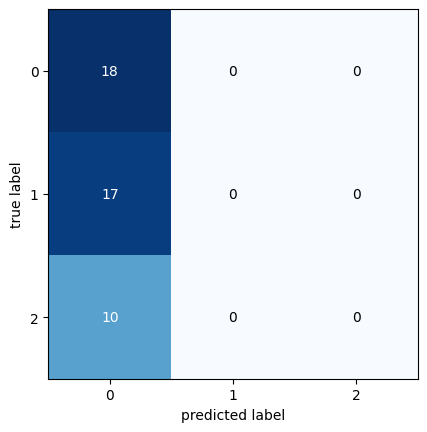

In [12]:
print(classification_report(y_test,y_pred))
matrix = confusion_matrix(y_test,y_pred)
fig,ax = plot_confusion_matrix(conf_mat=matrix)
plt.show()